In [1]:
from imblearn.over_sampling import ADASYN
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\PycharmProjects\GermanBankCreditCard\SouthGermanCredit\Preprocess.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [4]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [5]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

status                       0
duration                    70
credit_history               0
purpose                    118
amount                      72
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors               93
present_residence            0
property                     0
age                         23
other_installment_plans    186
housing                    286
number_credits               6
job                        370
people_liable              155
telephone                    0
foreign_worker              37
credit_risk                  0
dtype: int64

In [6]:
columns=['duration','purpose','amount','other_debtors','age','other_installment_plans','housing','number_credits','job',
        'people_liable','foreign_worker']
for i in columns:
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75 - q25
    minimum = q25 - 1.5*iqr
    maximum = q75 + 1.5*iqr
    df.loc[df[i] < minimum, i] = minimum
    df.loc[df[i] > maximum, i] = maximum

In [7]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [8]:
df.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                     1.028761
savings                    1.016677
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             1.098240
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

In [9]:
col=['amount','savings','number_credits']
for i in col:
    df[i]=np.log(df[i]+1)

In [10]:
df.skew()

status                     0.006957
duration                   0.625672
credit_history            -0.011886
purpose                    0.488335
amount                    -0.092265
savings                    0.832475
employment_duration       -0.117615
installment_rate          -0.531348
personal_status_sex       -0.305146
other_debtors              0.000000
present_residence         -0.272570
property                   0.045673
age                        0.906997
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.824755
job                        0.000000
people_liable              0.000000
telephone                  0.391868
foreign_worker             0.000000
credit_risk               -0.874183
dtype: float64

In [11]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18.0,4,2.0,6.956545,0.693147,2,4,2,1.0,4,2,21.0,3.0,2.0,0.693147,3.0,2.0,1,2.0,1
1,1,9.0,4,0.0,7.937375,0.693147,3,2,3,1.0,2,1,36.0,3.0,2.0,1.098612,3.0,2.0,1,2.0,1
2,2,12.0,2,6.0,6.735780,1.098612,4,2,2,1.0,4,1,23.0,3.0,2.0,0.693147,3.0,2.0,1,2.0,1
3,1,12.0,4,0.0,7.660585,0.693147,3,3,3,1.0,2,1,39.0,3.0,2.0,1.098612,3.0,2.0,1,2.0,1
4,1,12.0,4,0.0,7.683404,0.693147,3,4,3,1.0,4,2,38.0,3.0,2.0,1.098612,3.0,2.0,1,2.0,1


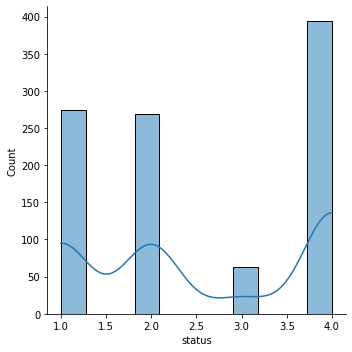

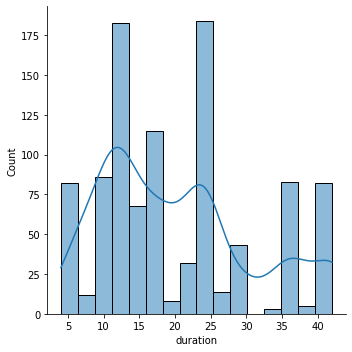

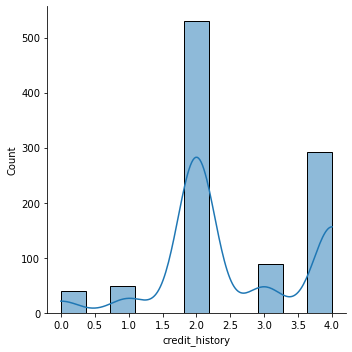

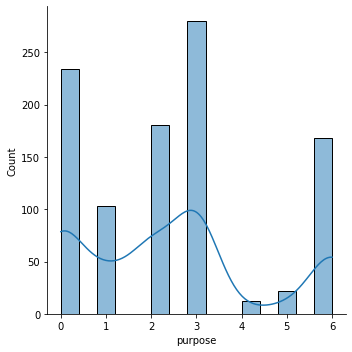

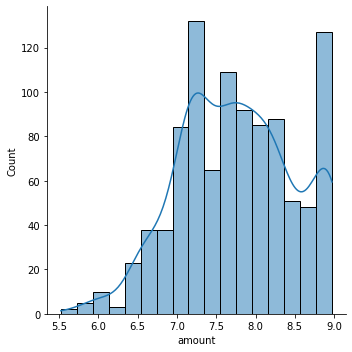

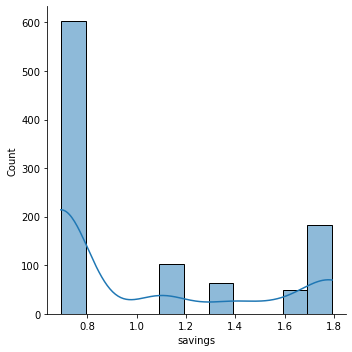

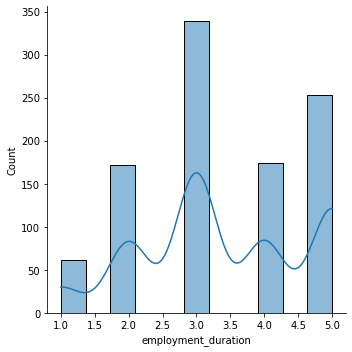

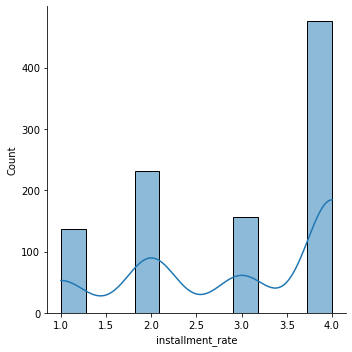

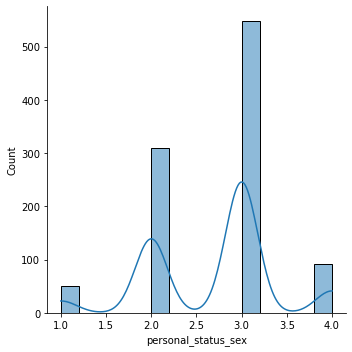

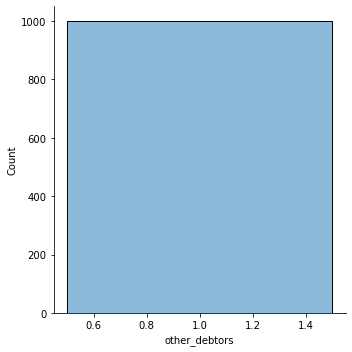

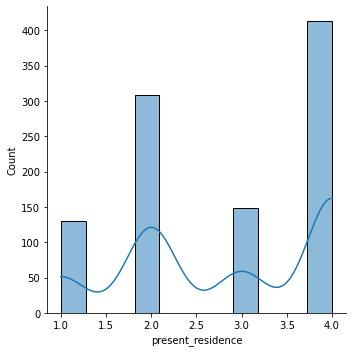

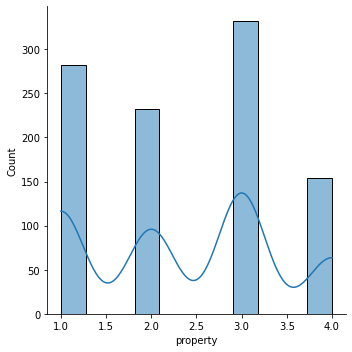

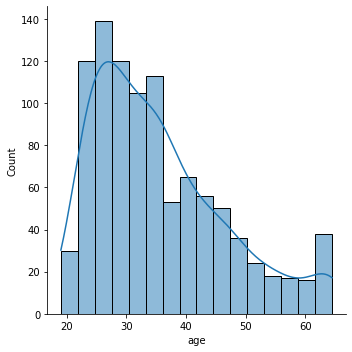

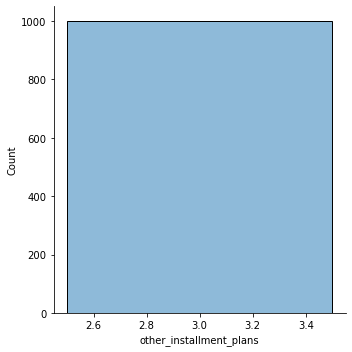

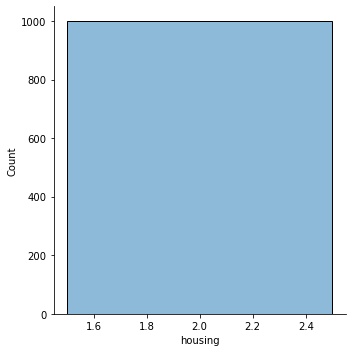

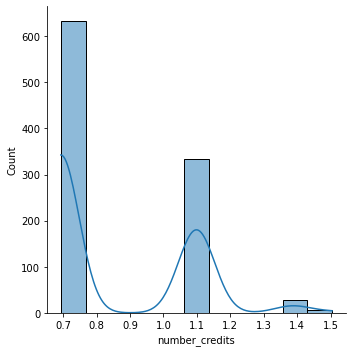

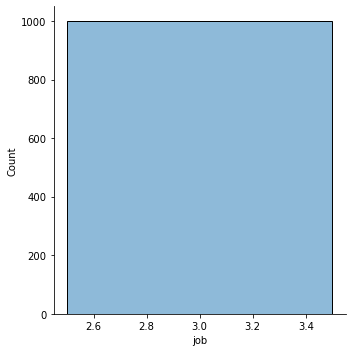

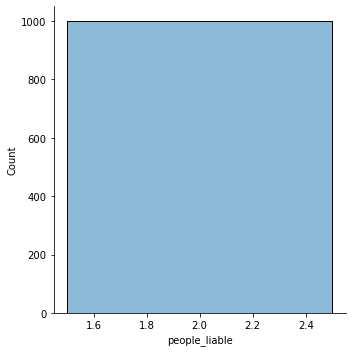

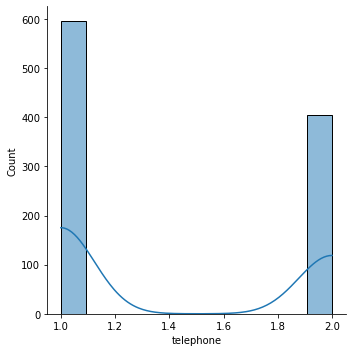

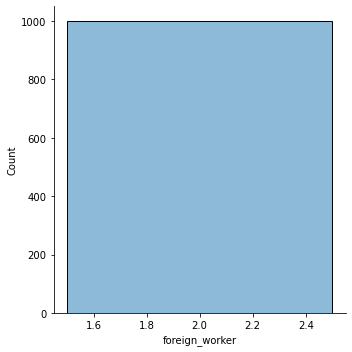

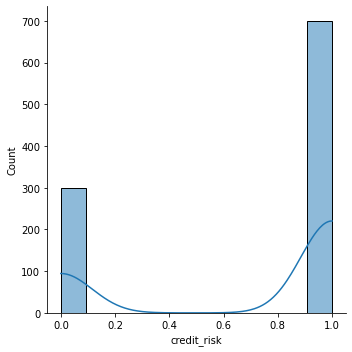

In [12]:
for i in df.columns:
    sns.displot(data=df,x=i,kde=True)

In [13]:
del df['other_debtors']
del df['other_installment_plans']
del df['housing']
del df['job']
del df['people_liable']
del df['foreign_worker']

In [14]:
scaling = [feature for feature in df.columns if feature not in ['credit_risk']]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[scaling])

StandardScaler()

In [16]:
scaler.transform(df[scaling])

array([[-1.25456565, -0.21743962,  1.34401408, ..., -1.30441307,
        -0.73657304, -0.82331789],
       [-1.25456565, -1.0657086 ,  1.34401408, ...,  0.0496958 ,
         1.13829638, -0.82331789],
       [-0.45902624, -0.78295227, -0.50342796, ..., -1.12386522,
        -0.73657304, -0.82331789],
       ...,
       [ 1.13205258,  0.06531671,  1.34401408, ..., -0.49194775,
        -0.73657304,  1.21459768],
       [-0.45902624, -0.78295227, -0.50342796, ...,  1.49407859,
        -0.73657304,  1.21459768],
       [-1.25456565,  0.91358569, -0.50342796, ..., -0.40167383,
        -0.73657304, -0.82331789]])

In [17]:
df2=pd.DataFrame(scaler.transform(df[scaling]),columns=df[scaling].columns)
df2.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,-1.254566,-0.217440,1.344014,-0.234588,-1.103856,-0.740466,-1.145978,0.918477,-0.963650,1.046987,-0.341055,-1.304413,-0.736573,-0.823318
1,-1.254566,-1.065709,1.344014,-1.230716,0.231565,-0.740466,-0.317959,-0.870183,0.449326,-0.765977,-1.293723,0.049696,1.138296,-0.823318
2,-0.459026,-0.782952,-0.503428,1.757667,-1.404433,0.168067,0.510060,-0.870183,-0.963650,1.046987,-1.293723,-1.123865,-0.736573,-0.823318
3,-1.254566,-0.782952,1.344014,-1.230716,-0.145290,-0.740466,-0.317959,0.024147,0.449326,-0.765977,-1.293723,0.320518,1.138296,-0.823318
4,-1.254566,-0.782952,1.344014,-1.230716,-0.114223,-0.740466,-0.317959,0.918477,0.449326,1.046987,-0.341055,0.230244,1.138296,-0.823318


In [18]:
final=pd.concat([df[['credit_risk']].reset_index(drop=True),df2],axis=1)
final.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,1,-1.254566,-0.217440,1.344014,-0.234588,-1.103856,-0.740466,-1.145978,0.918477,-0.963650,1.046987,-0.341055,-1.304413,-0.736573,-0.823318
1,1,-1.254566,-1.065709,1.344014,-1.230716,0.231565,-0.740466,-0.317959,-0.870183,0.449326,-0.765977,-1.293723,0.049696,1.138296,-0.823318
2,1,-0.459026,-0.782952,-0.503428,1.757667,-1.404433,0.168067,0.510060,-0.870183,-0.963650,1.046987,-1.293723,-1.123865,-0.736573,-0.823318
3,1,-1.254566,-0.782952,1.344014,-1.230716,-0.145290,-0.740466,-0.317959,0.024147,0.449326,-0.765977,-1.293723,0.320518,1.138296,-0.823318
4,1,-1.254566,-0.782952,1.344014,-1.230716,-0.114223,-0.740466,-0.317959,0.918477,0.449326,1.046987,-0.341055,0.230244,1.138296,-0.823318


In [19]:
#final.to_csv(r'C:\Users\Lenovo\PycharmProjects\GermanBankCreditCard\SouthGermanCredit\Final_Model.csv')

In [20]:
#import pickle
#file = 'Scaler_Credit_Data.pkl'

#pickle.dump(scaler,open(file,'wb'))